### Function4
The problem that function 4 needs to solve is the minimum cut problem, which is a dual problem with the maximum flow problem. Here we use the functions in the networkx package to perform calculations here, and get function 4.

In [147]:
# Need to load totDataframe in advance
def function4(timeinterval1,timeinterval2,user1,user2):
    data1 = totDataframe[totDataframe.time.between(timeinterval1[0],timeinterval1[1])]
    data2 = totDataframe[totDataframe.time.between(timeinterval2[0],timeinterval2[1])]
    data = pd.concat([data1,data2])
    usera = list(data['user_a'])
    userb = list(data['user_b'])
    weight = list(data['weights'])
    g4 = nx.DiGraph()
    for i in range(len(data)):
        g4.add_edge(usera[i],userb[i],capacity=weight[i])
    
    error = 0
    try:
        nx.shortest_path(g4,source=user1,target=user2)
    except:
        error = 1
    
    if error == 0:
        cut_value, partition = nx.minimum_cut(g4, user1, user2)
        reachable, non_reachable = partition
        cutset = set()
        for u, nbrs in ((n, g4[n]) for n in reachable):
            cutset.update((u, v) for v in nbrs if v in non_reachable)
   
    else:
        cut_value = "NA"
        cutset = "NA"
    
    return cut_value, cutset

Here is an example of function 4:

In [148]:
timeinterval1 = ["2009-12-20","2009-12-31"]
timeinterval2 = ["2009-12-10","2009-12-21"]
user1 = 225
user2 = 129325
cut_value, cutset = function4(timeinterval1,timeinterval2,user1,user2)
print("the minimum number of links (considering their weights) required to disconnect the two users （user1 and user2) is " + str(result))

the minimum number of links (considering their weights) required to disconnect the two users （user1 and user2) is 6.800000000000001


In [157]:
cutset

{(23354, 129325),
 (25824, 129325),
 (28494, 129325),
 (73656, 129325),
 (84478, 129325),
 (134554, 129325),
 (203540, 129325),
 (226621, 129325)}

### Visualization of function 4

In [160]:
# data process
def data_process_v4(timeinterval1,timeinterval2,user1,user2):
    data1 = totDataframe[totDataframe.time.between(timeinterval1[0],timeinterval1[1])]
    data2 = totDataframe[totDataframe.time.between(timeinterval2[0],timeinterval2[1])]
    data = pd.concat([data1,data2])
    
    return data

In [179]:
# 1 original graph
def original_graph(data):
    usera = list(data['user_a'])
    userb = list(data['user_b'])
    weight = list(data['weights'])
    g4 = nx.Graph()
    for i in range(len(data)):
        g4.add_edge(usera[i],userb[i],weight=weight[i])
    
    nx.draw_networkx(g4)
    plt.show()
    return 0


In [168]:
# 2 disconnect graph
def disconnect_graph(data,cutset):
    usera = list(data['user_a'])
    userb = list(data['user_b'])
    weight = list(data['weights'])
    g_dis = nx.Graph()
    for i in range(len(cutset)):
        for j in range(len(usera)):
            if usera[j] != list(cutset)[i][0] and userb[j] != list(cutset)[i][1]:
                g_dis.add_edge(usera[j],userb[j],weight=weight[j])
    
    nx.draw_networkx(g_dis)
    plt.show()
    return 0
    

In [170]:
# 3 links needed to cut
def link_cut(data,cutset):
    usera = list(data['user_a'])
    userb = list(data['user_b'])
    weight = list(data['weights'])
    g_cut = nx.Graph()
    for i in range(len(cutset)):
        for j in range(len(usera)):
            if usera[j] == list(cutset)[i][0] and userb[j] == list(cutset)[i][1]:
                g_cut.add_edge(usera[j],userb[j],weight=weight[j])
    
    nx.draw_networkx(g_cut)
    plt.show()
    return 0

In [ ]:
# data load
timeinterval1 = ["2009-12-20","2009-12-31"]
timeinterval2 = ["2009-12-10","2009-12-21"]
user1 = 225
user2 = 129325
cut_value, cutset = function4(timeinterval1,timeinterval2,user1,user2)
data = data_process_v4(timeinterval1,timeinterval2,user1,user2)

In [176]:
def f4_visualization():
    print("Please select the picture you want to output: \n 1.Graph 1 and graph 2 combined graph \n 2.Disconnected graph of graph 1 and graph 2 \n 3.Figure of cut links.")
    print("(Enter the corresponding number)")
    Num_input = input()

    if int(Num_input) == 1:
        original_graph(data)
    else:
        if int(Num_input) == 2:
            disconnect_graph(data,cutset)
        else:
            if int(Num_input) == 3:
                link_cut(data,cutset)
            else:
                print("Number you entered is error!")
    return 0

Please select the picture you want to output: 
 1.Graph 1 and graph 2 combined graph 
 2.Disconnected graph of graph 1 and graph 2 
 3.Figure of cut links.
(Enter the corresponding number)
2


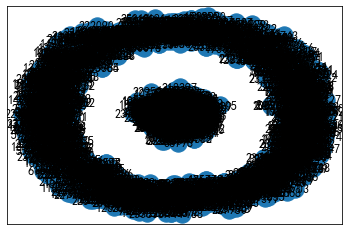

0

In [180]:
# example 1
f4_visualization()

Please select the picture you want to output: 
 1.Graph 1 and graph 2 combined graph 
 2.Disconnected graph of graph 1 and graph 2 
 3.Figure of cut links.
(Enter the corresponding number)
3


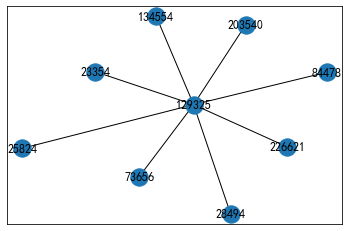

0

In [181]:
# example 2
f4_visualization()